In [2]:
import skimage.io as skio
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline
ndvi = pd.read_csv('data/ndvi-(landsat-8-sr)_goodCP_establishedJune2018.csv')

In [3]:
ndvi = ndvi.rename(columns={'Polygon 1': 'New Center Pivot', 'Polygon 2': 'Savanna'})\
    .set_index(ndvi.DateTime)\
    .dropna()

The x axis for this is not completely accurate because pandas doesn't correctly position nonuniform date sequences. Might be best to set a manual quarterly x axis from 2013 to 2018

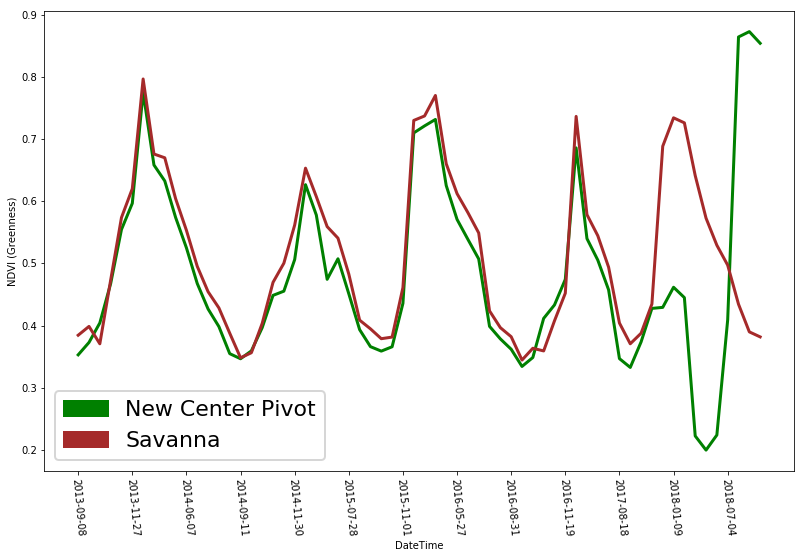

In [4]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
sb.set_context("poster")
sb.lineplot(y = 'New Center Pivot', x= 'DateTime', data = ndvi, ax=ax, color='green')
sb.lineplot(y = 'Savanna', x= 'DateTime', data = ndvi, ax=ax, color='brown')
dates = ndvi.DateTime.values[0::5]
ax.set_ylabel('NDVI (Greenness)')
ax.set_xticks(dates)
ax.set_xticklabels(dates, rotation=-85)
fig.set_size_inches(11.7, 8.27)
brown_patch = mpatches.Patch(color='brown', label='Savanna')
green_patch = mpatches.Patch(color='green', label='New Center Pivot')
plt.legend(handles=[green_patch, brown_patch])
plt.tight_layout()
plt.savefig('figures/NDVI_fig.png')